## Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
forest = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/forest.csv')
forest_area = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/forest_area.csv')
forest_area_ha = pd.read_csv("forest-area-km.csv")

forest_area_ha

,Entity,Code,Year,Forest area
0,Afghanistan,AFG,1990,1208440.0
1,Afghanistan,AFG,1991,1208440.0
2,Afghanistan,AFG,1992,1208440.0
3,Afghanistan,AFG,1993,1208440.0
4,Afghanistan,AFG,1994,1208440.0
...,...,...,...,...
7841,Zimbabwe,ZWE,2016,17628860.0
7842,Zimbabwe,ZWE,2017,17582790.0
7843,Zimbabwe,ZWE,2018,17536720.0
7844,Zimbabwe,ZWE,2019,17490650.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

countries_ha = forest_area_ha[forest_area_ha['Entity'] != "World"]
countries_ha["scaled"] = countries_ha["Forest area"]/1000000

### Visualization 1

Interactive choropleth world map visualizing the change in forest area as a percent of global forest area for every country

In [9]:
import plotly.express as px

fig = px.choropleth(countries_ha, 
                    locations='Code',
                    locationmode='ISO-3',
                    color='scaled',
                    color_continuous_scale="ylgn",
                    animation_frame='Year',
                    range_color=(0,900),
                    scope="world",
                    labels={'scaled': 'Forest area <br>(millions of hectares)'},
                    hover_name='Entity')

fig.update_layout(title={'text':'Forest area around the world (1990-2020)', 
                         'xanchor':'center', 'yanchor':'top', 'x':0.5})
fig.update_layout(coloraxis_colorbar_x=1.01)

fig.write_html("worldforests.html")
fig.show()

### Visualization 2

Top ten countries with the greatest shares of deforestation from 1990-2020

In [95]:
countries = forest_area_ha.loc[:,['Entity','Code']]
codes = pd.Series(forest_area_ha.Code.unique()).dropna().tolist()

In [55]:
pchange = []
diff = pd.DataFrame(codes)

for i in codes: # calculates difference in area between 2020 and 1990 for every country + world
    years = list(forest_area_ha.loc[forest_area_ha["Code"]==i, "Year"])
    areas = list(forest_area_ha.loc[forest_area_ha["Code"]==i, "Forest area"])
    pchange.append(areas[-1]-areas[0])
    
diff['change'] = pchange

In [56]:
deforest = diff[diff['change'] < 0]
deforest = deforest[deforest[0] != "OWID_WRL"]

In [63]:
topdef = diff.nsmallest(11, 'change')
topdef = topdef.rename(columns={0: 'Code'})
topdef = topdef[topdef['Code'] != "OWID_WRL"]
top10 = sum(topdef.loc[topdef['Code'] != 'OWID_WRL', 'change'])
world = topdef.loc[topdef['Code'] == 'OWID_WRL', 'change']
totald = sum(deforest.loc[deforest['change'] < 0,'change'])

In [64]:
topdef['Entity'] = ['Brazil', 'Indonesia', 'Democratic Republic of Congo', 'Angola', 
                    'Tanzania', 'Myanmar', 'Paraguay', 'Bolivia', 'Mozambique', 'Argentina']
topdef.loc[len(topdef.index)] = ['N/A', totald-top10, 'Other countries'] 

In [232]:
topdef

,index,Code,change,Entity
0,27,BRA,-92278400.0,Brazil
1,89,IDN,-26411800.0,Indonesia
2,51,COD,-24473760.0,Democratic Republic of Congo
3,5,AGO,-12655400.0,Angola
4,195,TZA,-11645010.0,Tanzania
5,132,MMR,-10674590.0,Myanmar
6,154,PRY,-9443600.0,Paraguay
7,24,BOL,-6970960.0,Bolivia
8,131,MOZ,-6634240.0,Mozambique
9,8,ARG,-6631000.0,Argentina


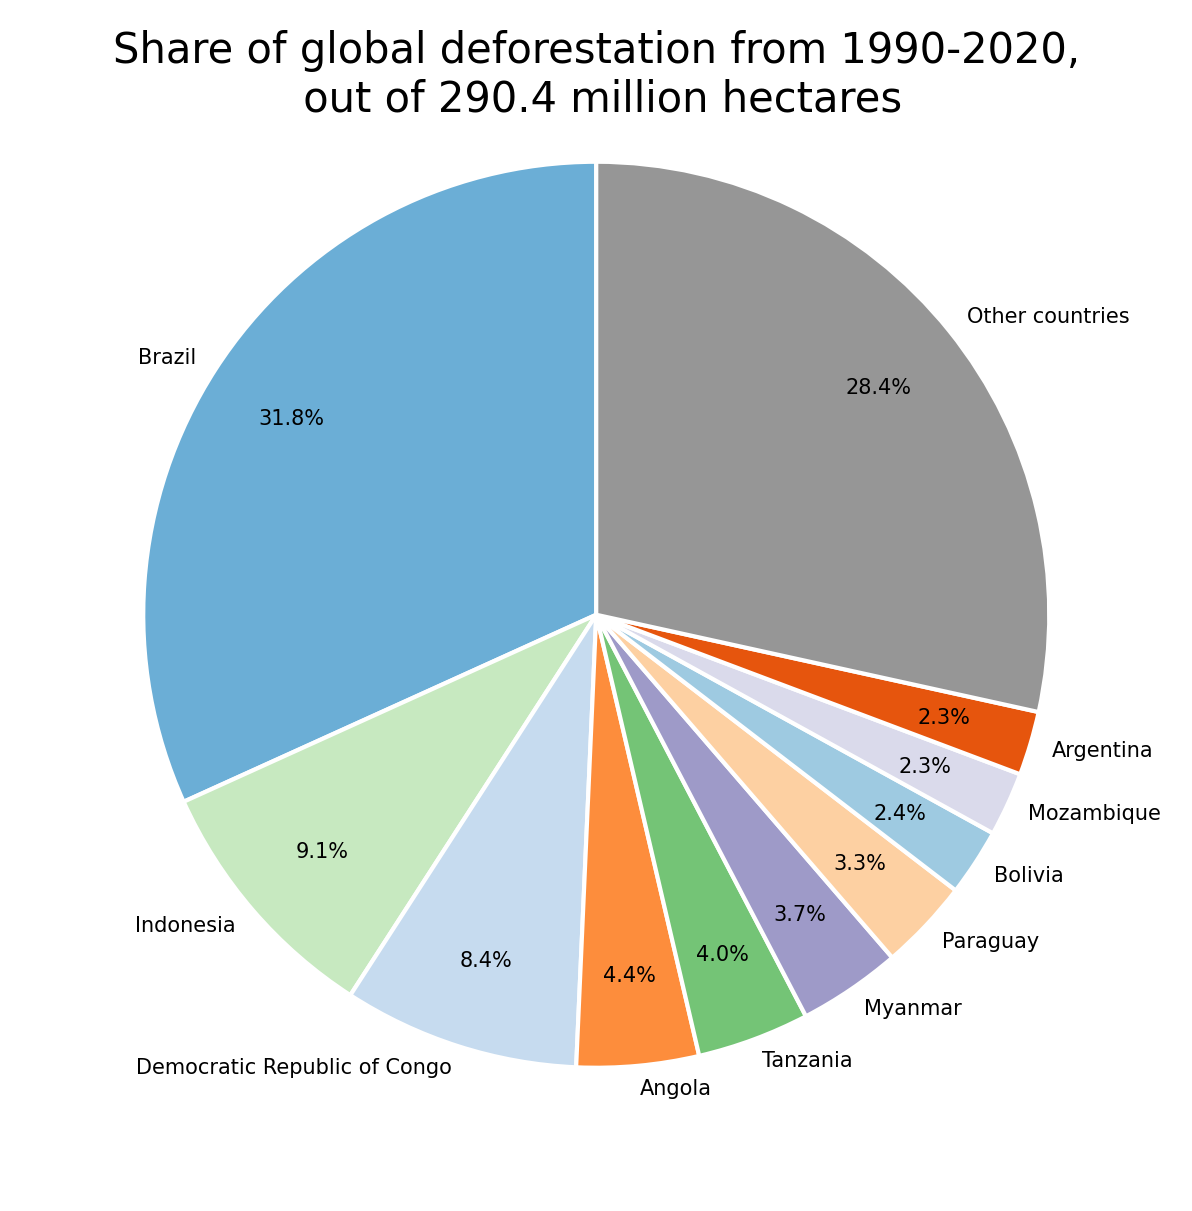

In [222]:
fig, ax = plt.subplots(figsize=(5,5))
plt.rcParams['figure.dpi'] = 300

cmap = plt.get_cmap("tab20c")
inner_colors = cmap(np.array([1, 11, 3, 5, 9, 13, 7, 2, 15, 4, 17]))

ax.pie(-topdef['change'], labels = topdef['Entity'], startangle = 90, autopct='%1.1f%%',
                       textprops={'fontsize': 5}, pctdistance=0.8, labeldistance=1.05, colors = inner_colors, 
                       wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white'})
ax.set_title("Share of global deforestation from 1990-2020,\n out of 290.4 million hectares", fontsize=10, y=1.0, pad=-15)

plt.savefig("shares.jpeg")
plt.show()

### Visualization 3

causes of deforestation in Brazil

In [13]:
brazil_loss = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-06/brazil_loss.csv')

In [15]:
brazil_loss

,entity,code,year,commercial_crops,flooding_due_to_dams,natural_disturbances,pasture,selective_logging,fire,mining,other_infrastructure,roads,tree_plantations_including_palm,small_scale_clearing
0,Brazil,BRA,2001,280000,0,0,1520000,96000,26000,9000,9000,13000,44000,249000
1,Brazil,BRA,2002,415000,79000,35000,2568000,96000,114000,9000,13000,31000,44000,293000
2,Brazil,BRA,2003,550000,0,35000,2761000,149000,44000,0,9000,35000,26000,358000
3,Brazil,BRA,2004,747000,26000,22000,2564000,131000,79000,0,13000,57000,92000,415000
4,Brazil,BRA,2005,328000,17000,26000,2665000,140000,393000,0,13000,35000,52000,288000
5,Brazil,BRA,2006,188000,17000,26000,1861000,52000,79000,0,9000,17000,26000,306000
6,Brazil,BRA,2007,79000,9000,22000,1577000,96000,446000,9000,13000,13000,39000,310000
7,Brazil,BRA,2008,52000,0,17000,1345000,61000,70000,9000,17000,48000,17000,397000
8,Brazil,BRA,2009,57000,9000,31000,847000,87000,44000,0,9000,9000,35000,301000
9,Brazil,BRA,2010,100000,0,44000,616000,114000,537000,4000,9000,22000,9000,271000


In [226]:
years = brazil_loss['year']

c1 = brazil_loss['pasture']
c2 = brazil_loss['commercial_crops']
c3 = brazil_loss['flooding_due_to_dams']
c4 = brazil_loss['natural_disturbances']
c5 = brazil_loss['selective_logging']
c6 = brazil_loss['fire']
c7 = brazil_loss['mining']
c8 = brazil_loss['other_infrastructure']
c9 = brazil_loss['roads']
c10 = brazil_loss['tree_plantations_including_palm']
c11 = brazil_loss['small_scale_clearing']

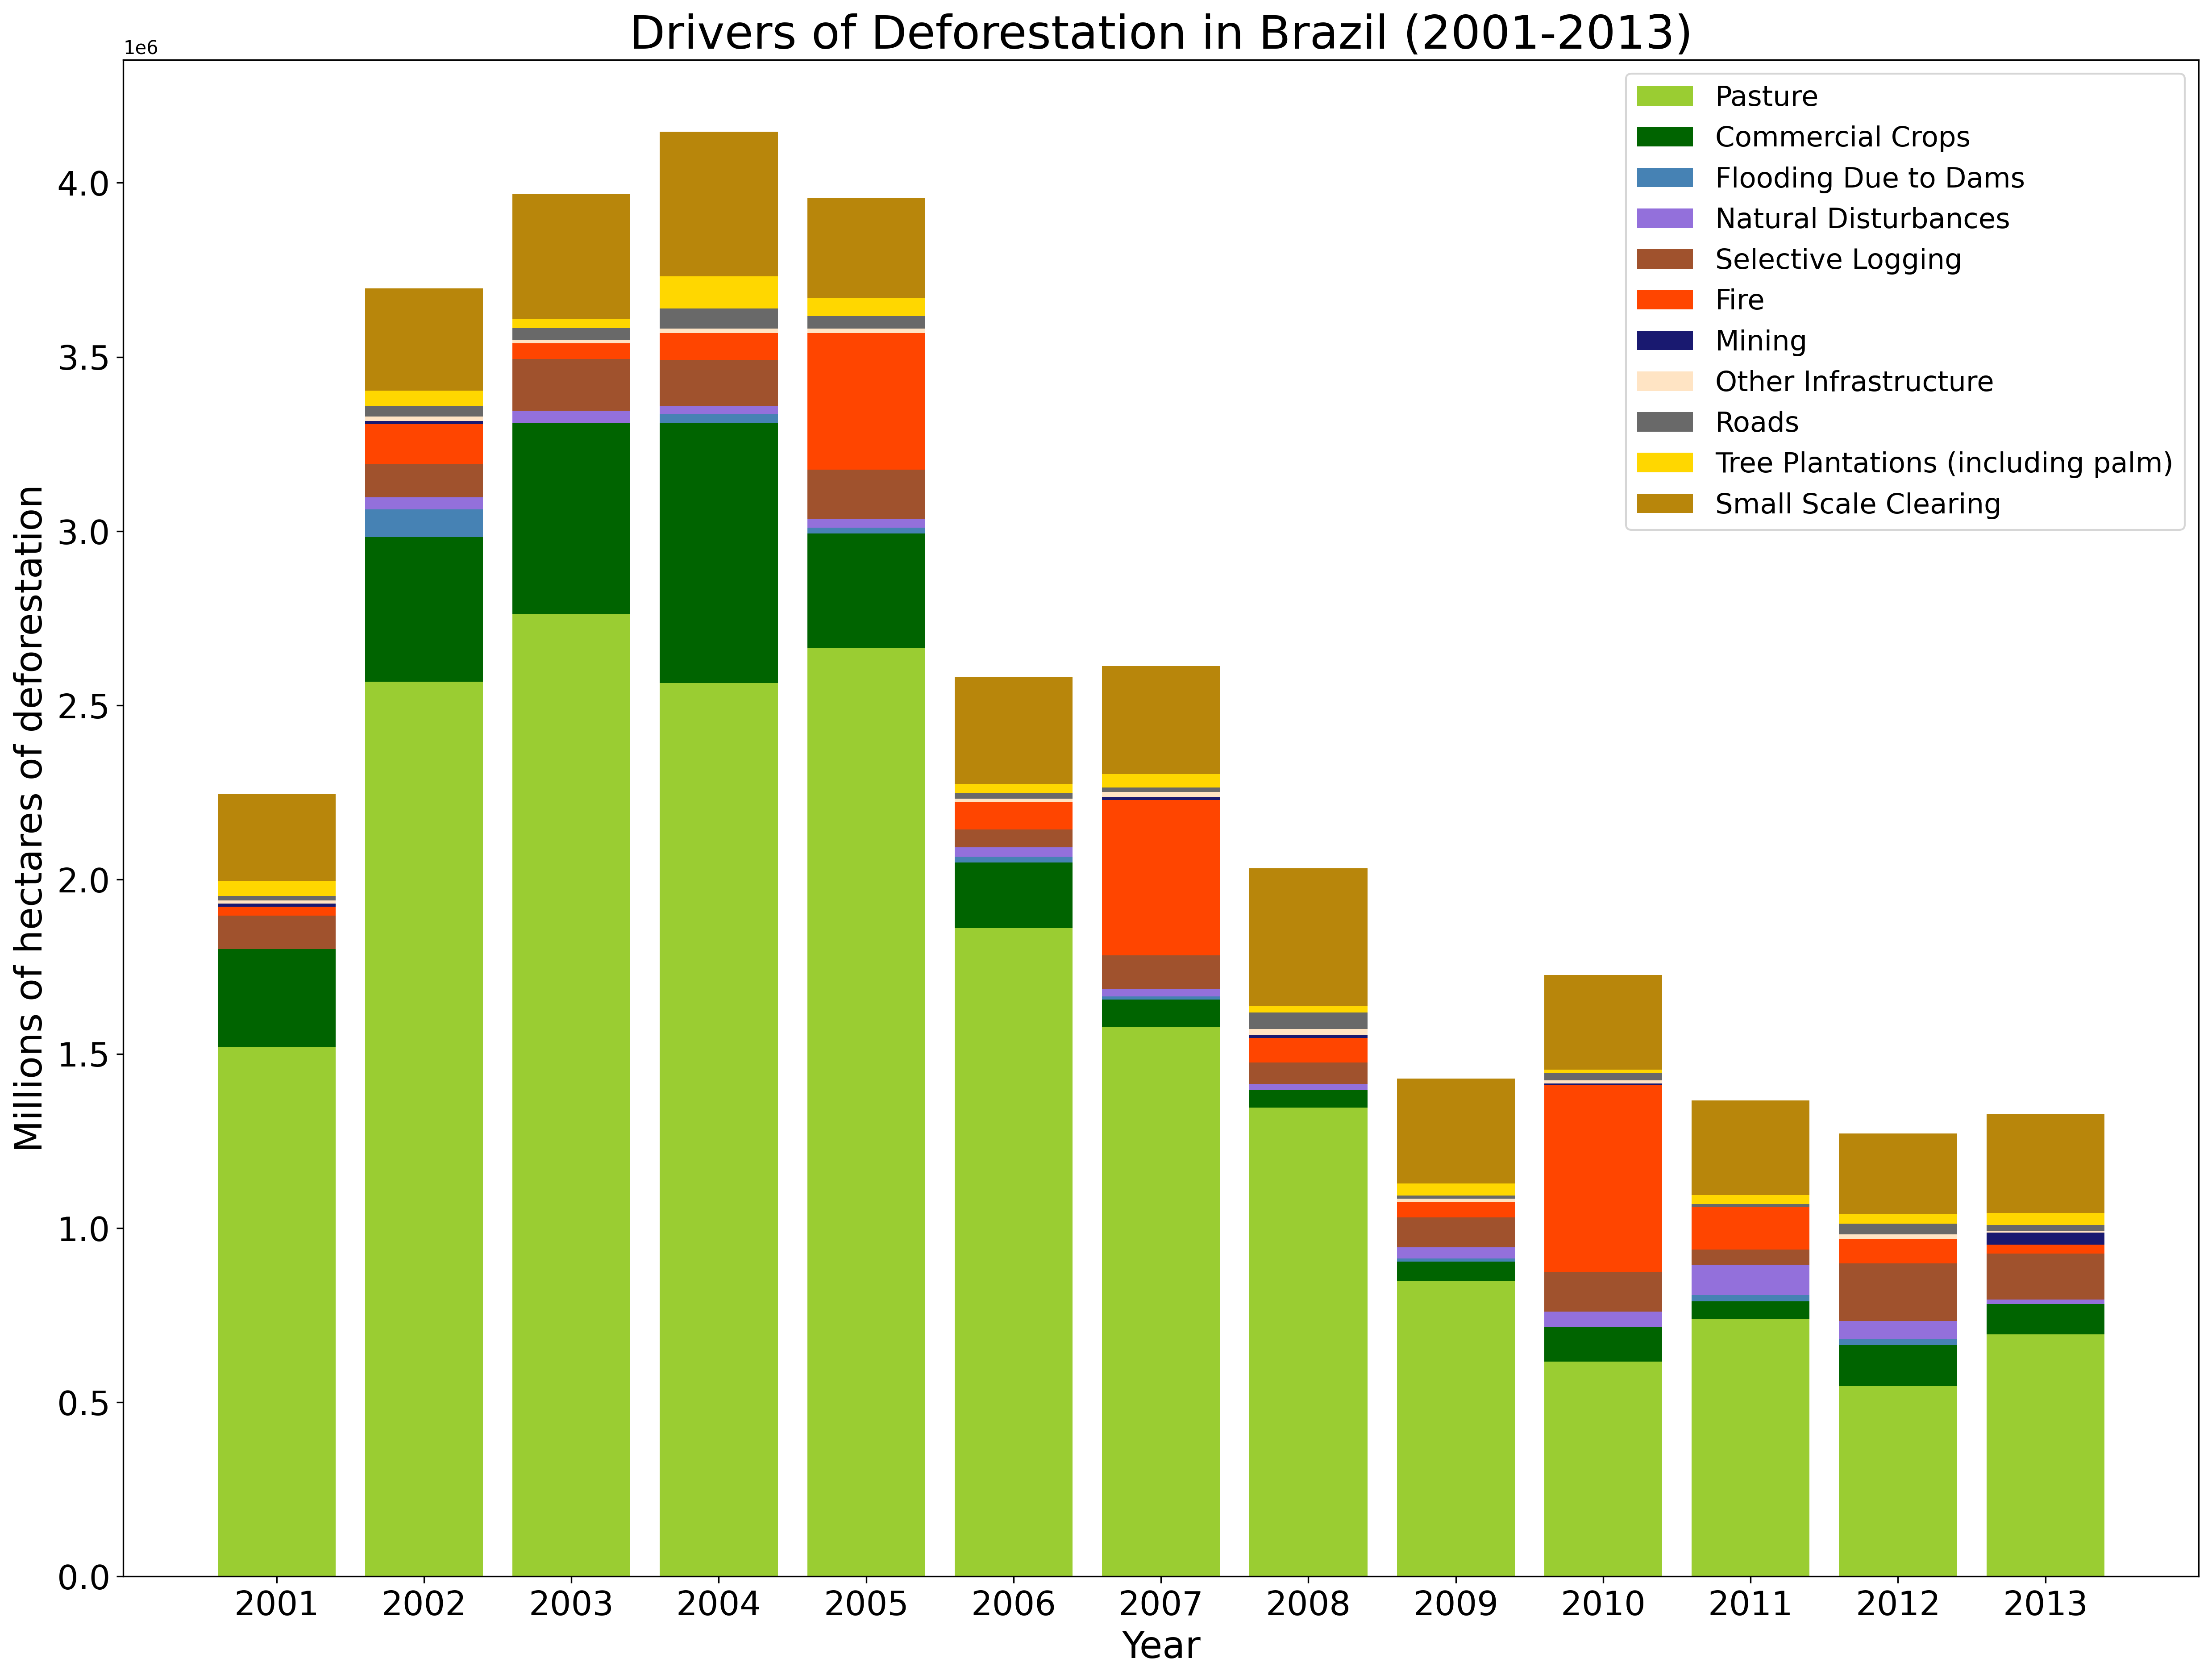

In [230]:
fig, ax = plt.subplots(figsize=(20,15))
plt.rcParams['figure.dpi'] = 300

colors =  plt.cm.tab20((np.arange(11)).astype(int))

plt.bar(years, c1, color='yellowgreen', label="Pasture")
plt.bar(years, c2, color='darkgreen', bottom=c1, label="Commercial Crops")
plt.bar(years, c3, color='steelblue', bottom=c1+c2, label="Flooding Due to Dams")
plt.bar(years, c4, color='mediumpurple', bottom=c1+c2+c3, label='Natural Disturbances')
plt.bar(years, c5, color='sienna', bottom=c1+c2+c3+c4, label='Selective Logging')
plt.bar(years, c6, color='orangered', bottom=c1+c2+c3+c4+c5, label='Fire')
plt.bar(years, c7, color='midnightblue', bottom=c1+c2+c3+c4+c5+c6, label='Mining')
plt.bar(years, c8, color='bisque', bottom=c1+c2+c3+c4+c5+c6+c7, label='Other Infrastructure')
plt.bar(years, c9, color='dimgray', bottom=c1+c2+c3+c4+c5+c6+c7+c8, label='Roads')
plt.bar(years, c10, color='gold', bottom=c1+c2+c3+c4+c5+c6+c7+c8+c9, 
        label='Tree Plantations (including palm)')
plt.bar(years, c11, color='darkgoldenrod', bottom=c1+c2+c3+c4+c5+c6+c7+c8+c9+c10, label='Small Scale Clearing')

plt.legend(fontsize=15)
plt.xticks(range(2001, 2014, 1), fontsize=18)
plt.xlabel("Year", fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("Millions of hectares of deforestation", fontsize=20)
plt.title("Drivers of Deforestation in Brazil (2001-2013)", fontsize=25)

plt.savefig("drivers.jpeg")
plt.show()

### Visualization 4

In [244]:
c = forest_area_ha.Entity.unique()

change = []

for i in c:
    years = list(forest_area_ha.loc[forest_area_ha["Entity"]==i, "Year"])
    areas = list(forest_area_ha.loc[forest_area_ha["Entity"]==i, "Forest area"])
    change.append(0)
    if not np.any(areas):
        change.extend(np.zeros(len(areas)-1))
    else:
        yr1990 = areas[0] 
        for j in range(len(areas)-1):
            change.append(100*(areas[j+1]-yr1990)/yr1990)
            
forest_area_ha['percentchange'] = change

In [245]:
wc = forest_area_ha[forest_area_ha['Code'].notna()]
wc2020 = wc[wc["Year"]==2020]

smallest = list(wc2020.nsmallest(10,'percentchange')['Entity'])

wc2020.nsmallest(10,'percentchange')

,Entity,Code,Year,Forest area,percentchange
4897,Nicaragua,NIC,2020,3407530.0,-46.751686
4928,Niger,NER,2020,1079700.0,-44.488432
2611,Gambia,GMB,2020,242670.0,-41.477355
5482,Paraguay,PRY,2020,16102260.0,-36.967242
4048,Malawi,MWI,2020,2241700.0,-35.982523
1415,Chad,TCD,2020,4313000.0,-35.913819
5914,Saint Pierre and Miquelon,SPM,2020,1220.0,-35.789474
758,Benin,BEN,2020,3135150.0,-35.159199
7229,Uganda,UGA,2020,2337900.0,-34.612792
4264,Mauritania,MRT,2020,312800.0,-34.291236


In [249]:
wctop = wc[wc['Entity'].isin(smallest)]
wctop['percentchange'] = wctop['percentchange']+100
wctop

,Entity,Code,Year,Forest area,percentchange
728,Benin,BEN,1990,4835150.0,100.000000
729,Benin,BEN,1991,4765150.0,98.552268
730,Benin,BEN,1992,4695150.0,97.104537
731,Benin,BEN,1993,4625150.0,95.656805
732,Benin,BEN,1994,4555150.0,94.209073
...,...,...,...,...,...
7225,Uganda,UGA,2016,2502908.0,70.002209
7226,Uganda,UGA,2017,2461656.0,68.848459
7227,Uganda,UGA,2018,2420404.0,67.694709
7228,Uganda,UGA,2019,2379152.0,66.540958


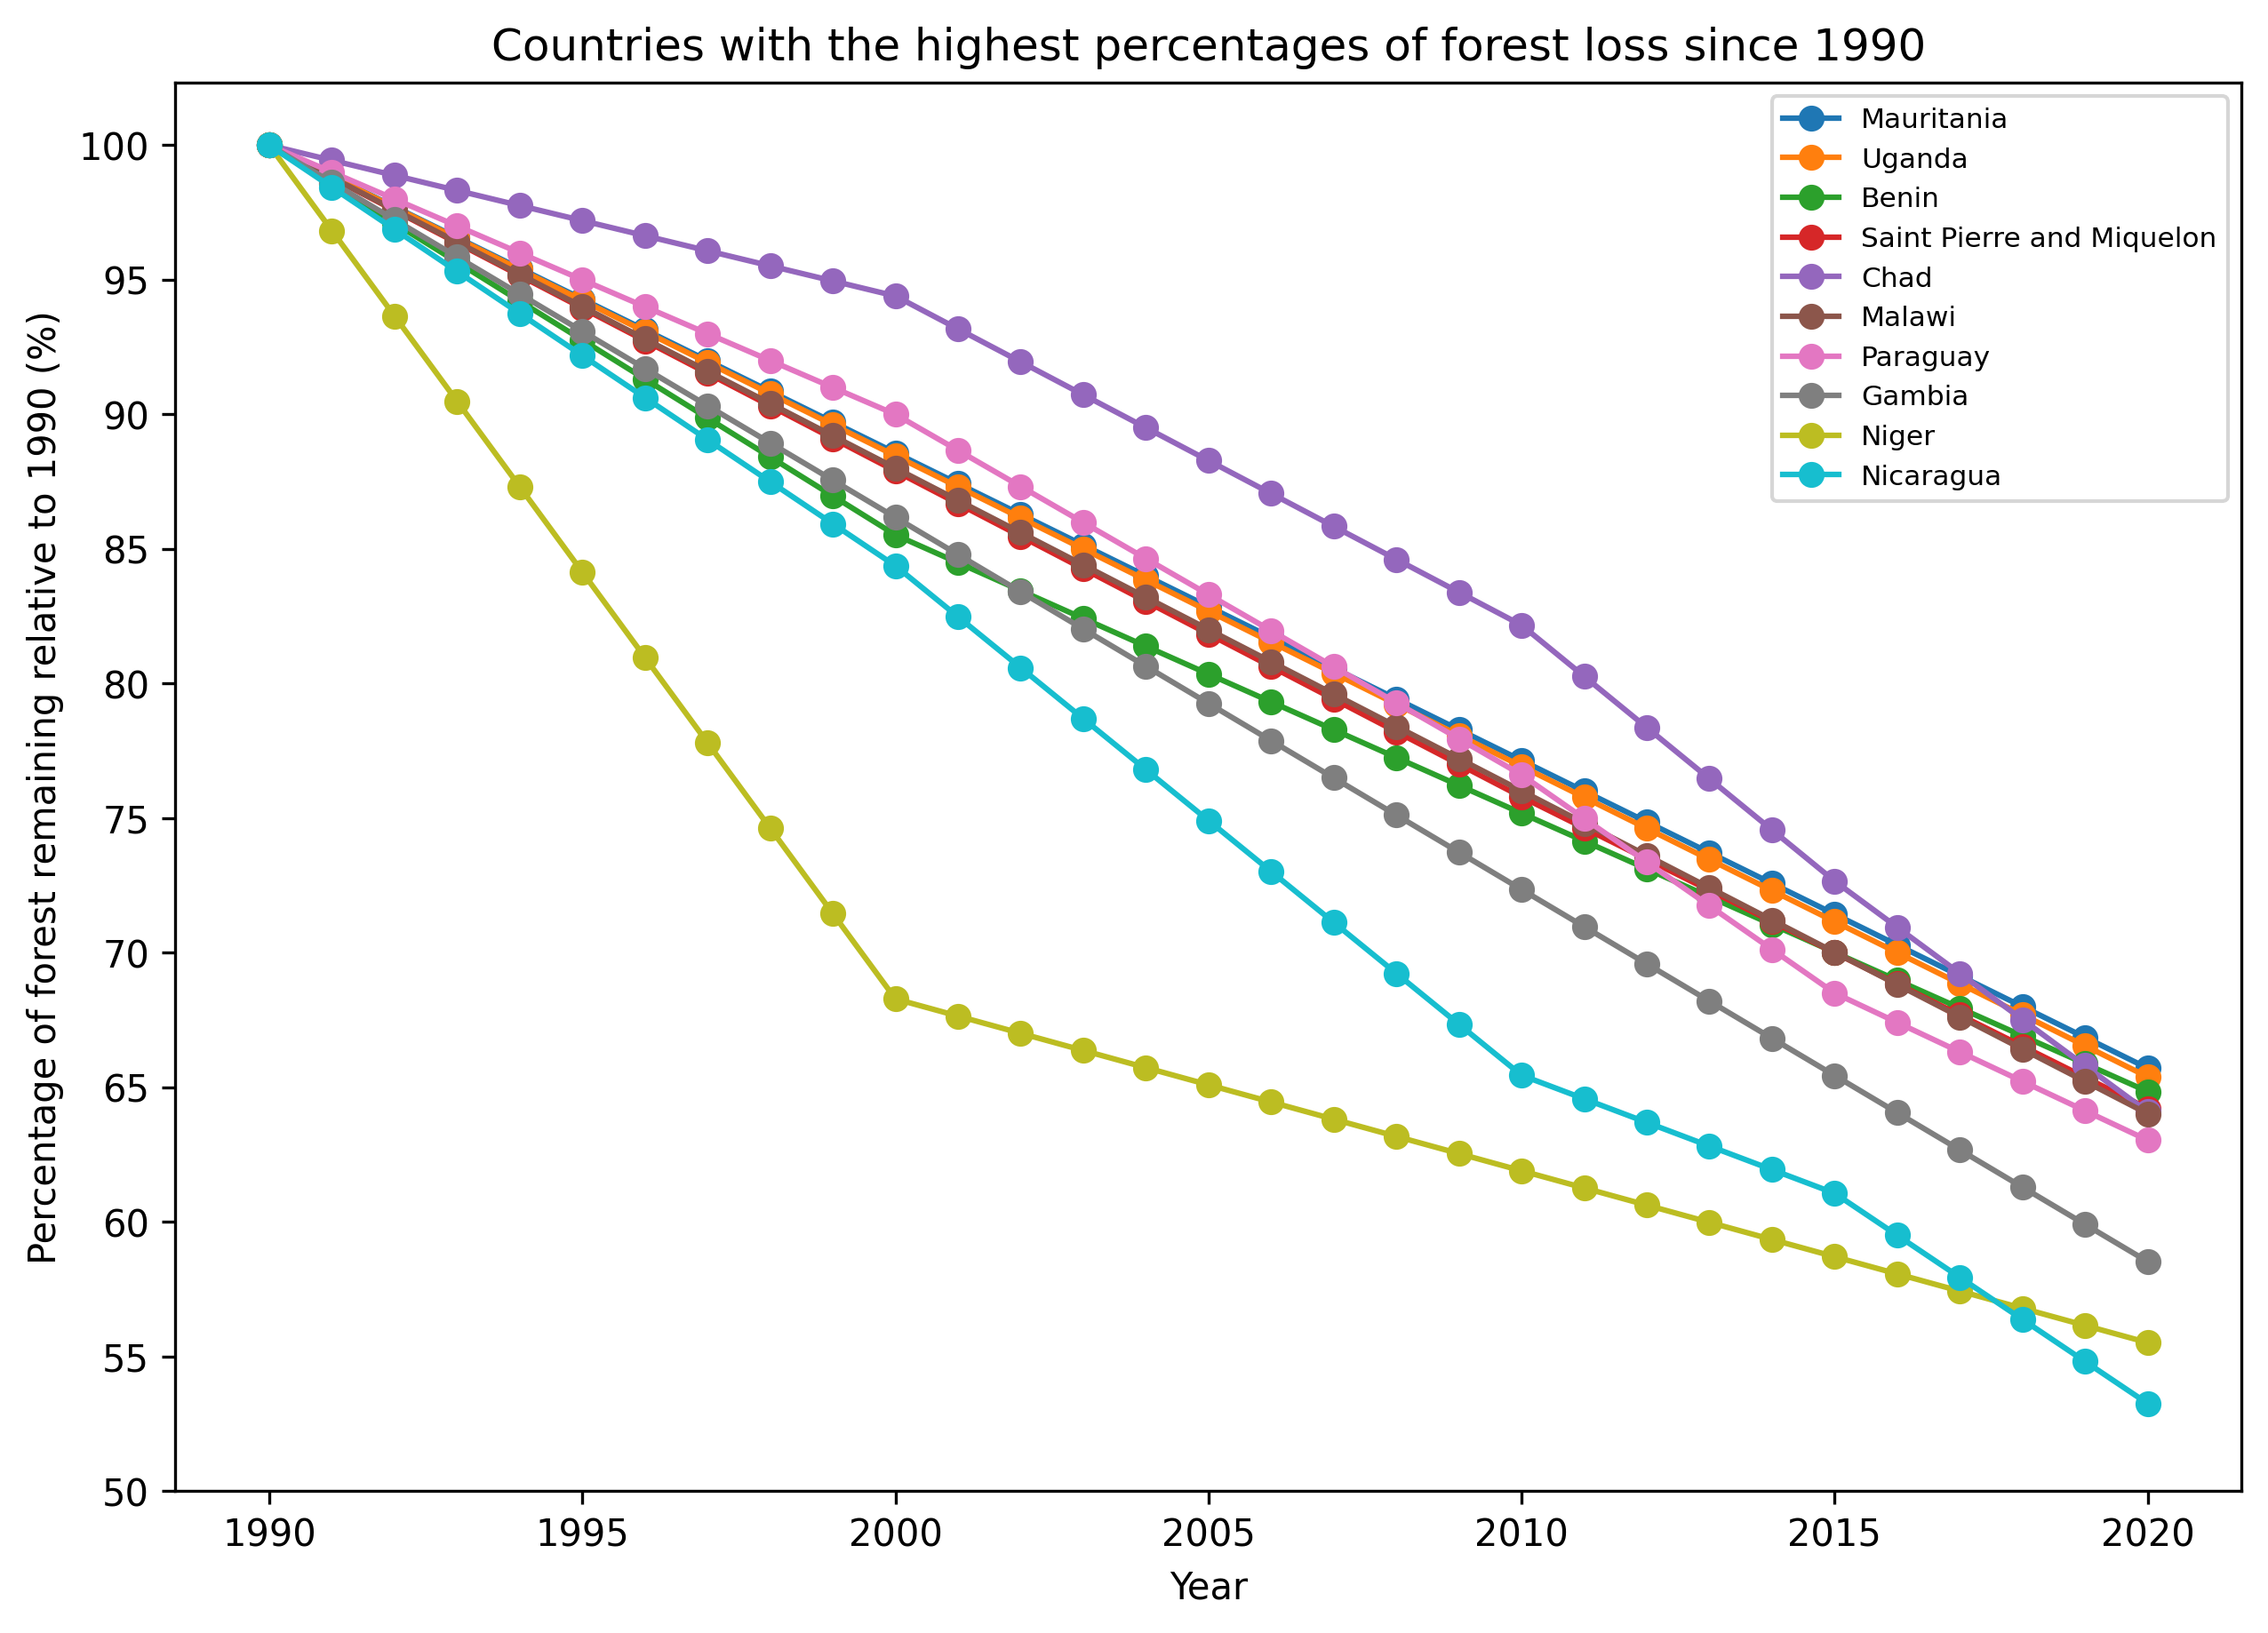

In [258]:
fig, ax = plt.subplots(figsize = (10,7))

for i in range(0,10):
    j = smallest[9-i]
    ax.plot(wctop.loc[wctop.loc[:,'Entity']==j,'Year'],
             wctop.loc[wctop.loc[:,'Entity']==j,'percentchange'], marker="o", label=j)

plt.legend(prop={'size': 7.5}, loc="upper right")
plt.yticks(range(50,105,5))
plt.ylabel("Percentage of forest remaining relative to 1990 (%)")
plt.xlabel("Year")
plt.title("Countries with the highest percentages of forest loss since 1990")

plt.savefig("percentage.jpeg")
plt.show()